In [69]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [63]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [2]:
import random
random.seed(1001)

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [126]:
data = pd.read_csv("train.csv")
data

,id,target,0,1,2,3,4,5,6,7,...,290,291,292,293,294,295,296,297,298,299
0,0,1.0,-1.067,-1.114,-0.616,0.376,1.090,0.467,-0.422,0.460,...,0.220,-0.339,0.254,-0.179,0.352,0.125,0.347,0.436,0.958,-0.824
1,1,0.0,-0.831,0.271,1.716,1.096,1.731,-0.197,1.904,-0.265,...,-0.765,-0.735,-1.158,2.554,0.856,-1.506,0.462,-0.029,-1.932,-0.343
2,2,0.0,0.099,1.390,-0.732,-1.065,0.005,-0.081,-1.450,0.317,...,-1.311,0.799,-1.001,1.544,0.575,-0.309,-0.339,-0.148,-0.646,0.725
3,3,1.0,-0.989,-0.916,-1.343,0.145,0.543,0.636,1.127,0.189,...,-1.370,1.093,0.596,-0.589,-0.649,-0.163,-0.958,-1.081,0.805,3.401
4,4,0.0,0.811,-1.509,0.522,-0.360,-0.220,-0.959,0.334,-0.566,...,-0.178,0.718,-1.017,1.249,-0.596,-0.445,1.751,1.442,-0.393,-0.643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,245,1.0,-0.068,-0.184,-1.153,0.610,0.414,1.557,-0.234,0.950,...,1.492,1.430,-0.333,-0.200,-1.073,0.797,1.980,1.191,1.032,-0.402
246,246,0.0,-0.234,-1.373,-2.050,-0.408,-0.255,0.784,0.986,-0.891,...,-0.996,0.678,1.395,0.714,0.215,-0.537,-1.267,-1.021,0.747,0.128
247,247,0.0,-2.327,-1.834,-0.762,0.660,-0.858,-2.764,-0.539,-0.065,...,-1.237,-0.620,0.670,-2.010,0.438,1.972,-0.379,0.676,-1.220,-0.855
248,248,1.0,-0.451,-0.204,-0.762,0.261,0.022,-1.487,-1.122,0.141,...,0.729,0.411,2.366,-0.021,0.160,0.045,0.208,-2.117,-0.546,-0.093


In Don't Overfit! II competition we have a binary classification task. 300 columns, 250 training samples! We need to be able to build a model without overfitting

## So task is BİNARY CLASSIFICATON

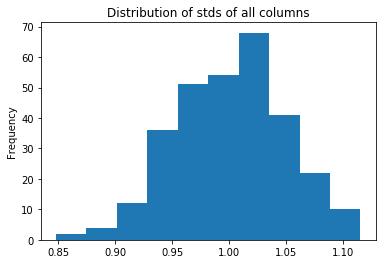

In [89]:

labels = data["target"]
standart_deviation = data[data.columns[2:]].std()
standart_deviation.plot.hist(title = 'Distribution of stds of all columns' )

Standard deviation is a number used to tell how measurements for a group are spread out from the average (mean), or expected value. A low standard deviation means that most of the numbers are close to the average. A high standard deviation means that the numbers are more spread out. So lets look at now, mean dist.

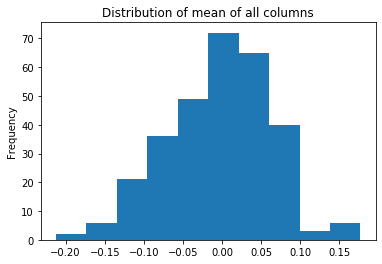

In [92]:
mean_value = data[data.columns[2:]].mean()
mean_value.plot.hist(title = 'Distribution of mean of all columns')

In [98]:
labels.value_counts()

0.0    183
1.0     67
Name: target, dtype: int64

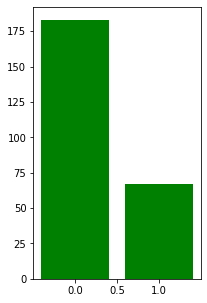

In [123]:
names = [i for i in labels.value_counts().keys()]
values = [labels.value_counts()[i] for i in range(len(labels_names))]
plt.figure(figsize=(3, 5))
plt.bar(names, values,color="green")
plt.show()

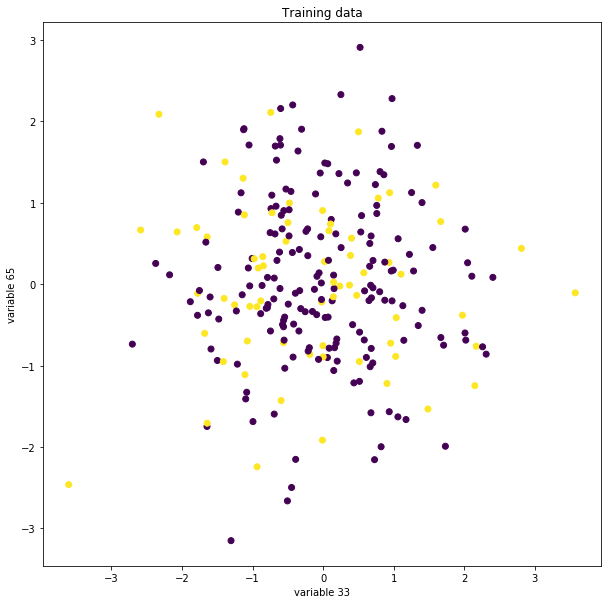

In [132]:
plt.figure(figsize=(10,10))
plt.scatter(data['33'],data['65'],c=data['target'])
#plt.plot([-1.6,1.4],[3,-3],':k')
plt.xlabel('variable 33')
plt.ylabel('variable 65')
plt.title('Training data')
plt.show()

In [20]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [23]:
vectorizer = TextVectorization(output_mode="binary", ngrams=2)
vectorizer.adapt(training_data)
integer_data = vectorizer(training_data)
print(integer_data)

tf.Tensor(
[[0 1 1 1 1 0 1 1 1 0 0 0 0 0 0 1 1]
 [0 1 1 0 0 1 0 0 0 1 1 1 1 1 1 0 0]], shape=(2, 17), dtype=int64)


In [24]:
from tensorflow.keras.layers.experimental.preprocessing import Normalization

# Example image data, with values in the [0, 255] range
training_data = np.random.randint(0, 256, size=(64, 200, 200, 3)).astype("float32")

normalizer = Normalization(axis=-1)
normalizer.adapt(training_data)

normalized_data = normalizer(training_data)
print("var: %.4f" % np.var(normalized_data))
print("mean: %.4f" % np.mean(normalized_data))

var: 1.0000
mean: -0.0000
